In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Specialized visualization
import waterfall_chart
from pandas.plotting import parallel_coordinates

# Statistical analysis
from scipy.stats import chi2_contingency, chi2

# Machine learning datasets
from sklearn.datasets import load_iris

# To remove warnings
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('clean_survey_data.csv')

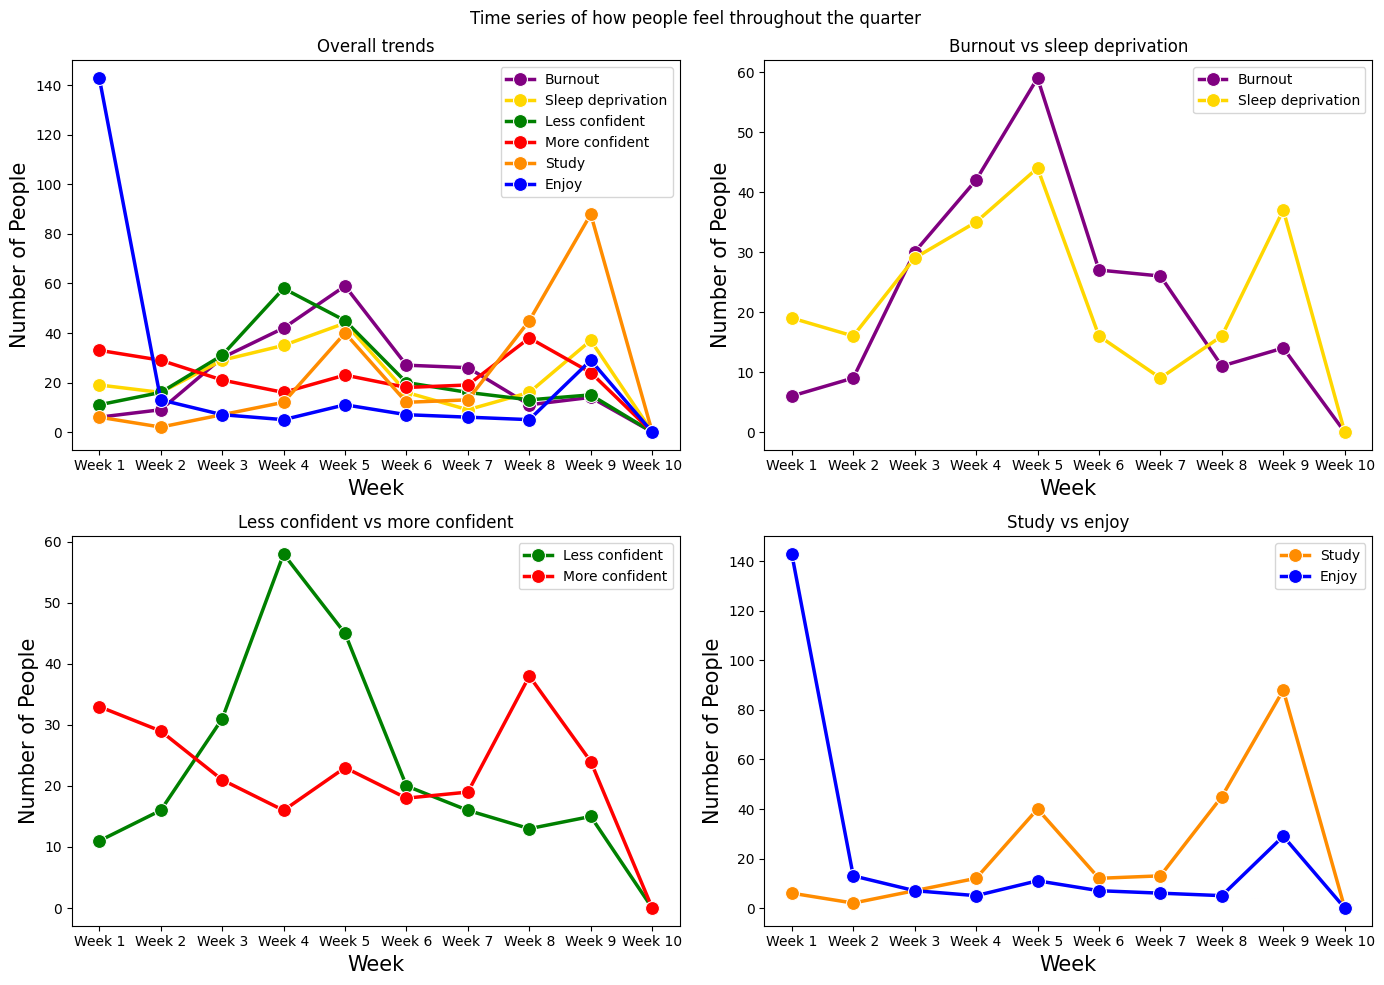

In [2]:
df = pd.read_csv('clean_survey_data.csv')

# rename column to be shorter
df = df.rename(columns={
    'Think about your time at UCR. Which week during the quarter do you: [Start feeling burnout]': 'Burnout',
    'Think about your time at UCR. Which week during the quarter do you: [Have sleep deprivation]': 'Sleep_deprivation',
    'Think about your time at UCR. Which week during the quarter do you: [Start feeling less confident in the material]': 'Less_confident',
    'Think about your time at UCR. Which week during the quarter do you: [Start feeling more confident in the material]': 'More_confident',
    'Think about your time at UCR. Which week during the quarter do you: [Study the most]': 'Study',
    'Think about your time at UCR. Which week during the quarter do you: [Enjoy the most]': 'Enjoy'
})

# set weeks in order
week = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9', 'Week 10']
week_order = {w: i for i, w in enumerate(week)}

# converts column from categorical to quantitative and keeps the week order
df['Burnout'] = pd.Categorical(df['Burnout'], categories=week, ordered=True)
df['Sleep_deprivation'] = pd.Categorical(df['Sleep_deprivation'], categories=week, ordered=True)
df['Less_confident'] = pd.Categorical(df['Less_confident'], categories=week, ordered=True)
df['More_confident'] = pd.Categorical(df['More_confident'], categories=week, ordered=True)
df['Study'] = pd.Categorical(df['Study'], categories=week, ordered=True)
df['Enjoy'] = pd.Categorical(df['Enjoy'], categories=week, ordered=True)

# gets counts for each variable every week
burnout_counts = df['Burnout'].value_counts().reindex(week, fill_value=0)
sleep_counts = df['Sleep_deprivation'].value_counts().reindex(week, fill_value=0)
less_counts = df['Less_confident'].value_counts().reindex(week, fill_value=0)
more_counts = df['More_confident'].value_counts().reindex(week, fill_value=0)
study_counts = df['Study'].value_counts().reindex(week, fill_value=0)
enjoy_counts = df['Enjoy'].value_counts().reindex(week, fill_value=0)


fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Graph 1
sns.lineplot(x=burnout_counts.index, y=burnout_counts.values, marker='o', markersize=10, linewidth=2.5, color='purple', label='Burnout', ax=axes[0,0])
sns.lineplot(x=sleep_counts.index, y=sleep_counts.values, marker='o', markersize=10, linewidth=2.5, color='gold', label='Sleep deprivation', ax=axes[0,0])
sns.lineplot(x=less_counts.index, y=less_counts.values, marker='o', markersize=10, linewidth=2.5, color='green', label='Less confident', ax=axes[0,0])
sns.lineplot(x=more_counts.index, y=more_counts.values, marker='o', markersize=10, linewidth=2.5, color='red', label='More confident', ax=axes[0,0])
sns.lineplot(x=study_counts.index, y=study_counts.values, marker='o', markersize=10, linewidth=2.5, color='darkorange', label='Study', ax=axes[0,0])
sns.lineplot(x=enjoy_counts.index, y=enjoy_counts.values, marker='o', markersize=10, linewidth=2.5, color='blue', label='Enjoy', ax=axes[0,0])
axes[0,0].set_title("Overall trends")
axes[0,0].set_xlabel("Week", fontsize=15)
axes[0,0].set_ylabel("Number of People", fontsize=15)
fig.suptitle('Time series of how people feel throughout the quarter')

# Graph 2
sns.lineplot(x=burnout_counts.index, y=burnout_counts.values, marker='o', markersize=10, linewidth=2.5, color='purple', label='Burnout', ax=axes[0,1])
sns.lineplot(x=sleep_counts.index, y=sleep_counts.values, marker='o', markersize=10, linewidth=2.5, color='gold', label='Sleep deprivation', ax=axes[0,1])
axes[0,1].set_xlabel("Week", fontsize=15)
axes[0,1].set_ylabel("Number of People", fontsize=15)
axes[0,1].set_title("Burnout vs sleep deprivation")

# Graph 3
sns.lineplot(x=less_counts.index, y=less_counts.values, marker='o', markersize=10, linewidth=2.5, color='green', label='Less confident', ax=axes[1,0])
sns.lineplot(x=more_counts.index, y=more_counts.values, marker='o', markersize=10, linewidth=2.5, color='red', label='More confident', ax=axes[1,0])
axes[1,0].set_xlabel("Week", fontsize=15)
axes[1,0].set_ylabel("Number of People", fontsize=15)
axes[1,0].set_title("Less confident vs more confident")

# Graph 4
sns.lineplot(x=study_counts.index, y=study_counts.values, marker='o', markersize=10, linewidth=2.5, color='darkorange', label='Study', ax=axes[1,1])
sns.lineplot(x=enjoy_counts.index, y=enjoy_counts.values, marker='o', markersize=10, linewidth=2.5, color='blue', label='Enjoy', ax=axes[1,1])
axes[1,1].set_xlabel("Week", fontsize=15)
axes[1,1].set_ylabel("Number of People", fontsize=15)
axes[1,1].set_title("Study vs enjoy")

plt.tight_layout()
plt.show()



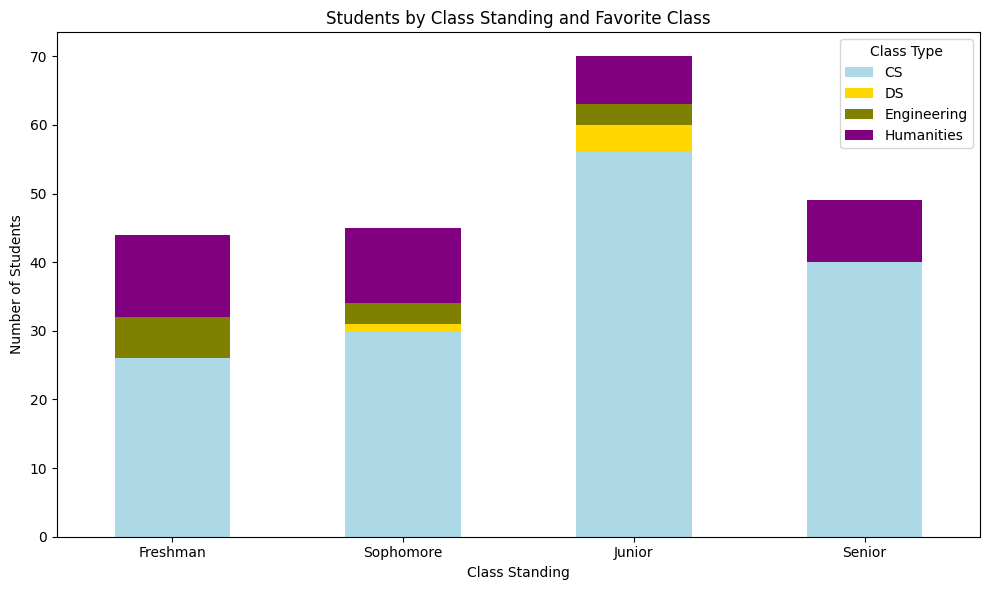

CONTINGENCY TABLE: Observed Frequencies
           CS  DS  Engineering  Humanities
Standing                                  
Freshman   26   0            6          12
Sophomore  30   1            3          11
Junior     56   4            3           7
Senior     40   0            0           9

Row Totals: [44 45 70 49] (Freshman, Sophomore, Junior, Senior)
Column Totals: [152   5  12  39] (CS, DS, Engineering, Humanities)
Grand Total: 208 students surveyed


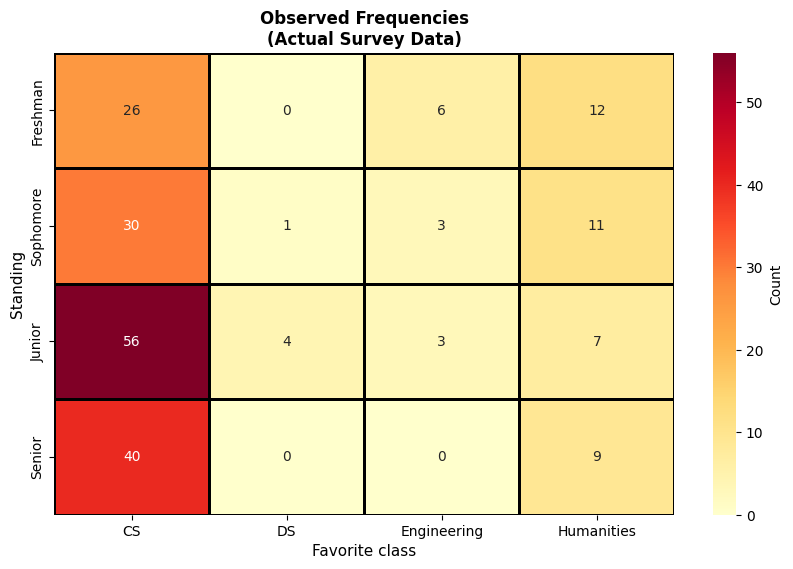

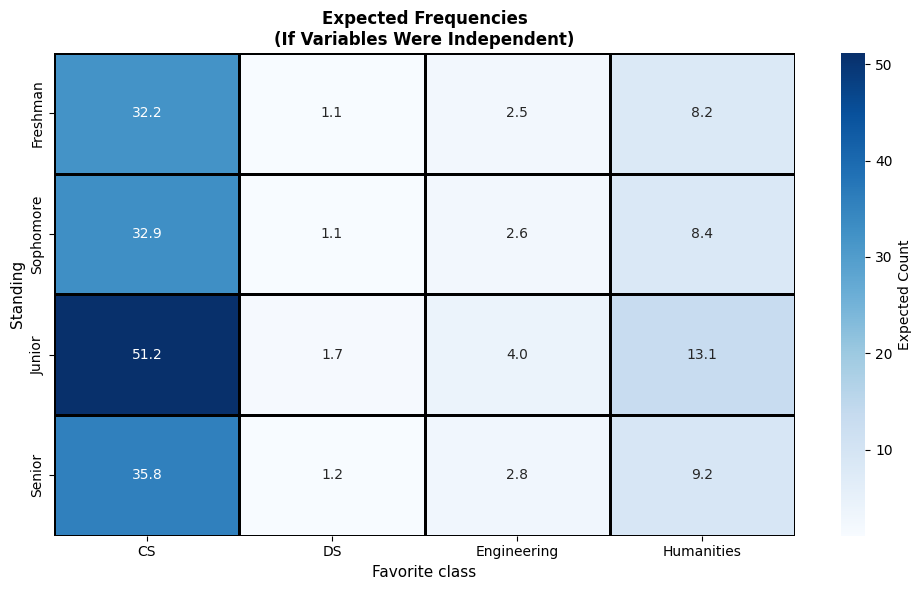


CHI-SQUARE TEST RESULTS
Chi-Square Statistic (χ²): 21.0358
P-value: 0.012493
Degrees of Freedom: 9

Significance Level: α = 0.05
Critical Value at α=0.05: 16.9190

INTERPRETATION
✓ REJECT the null hypothesis (independence)
  → The p-value (0.012493) is less than 0.05
  → The χ² statistic (21.0358) exceeds the critical value (16.9190)

  CONCLUSION: Standing and favorite class ARE associated!
  There is a statistically significant relationship between class standing and favorite class preferences.

KEY INSIGHTS FROM THE DATA
• The distribution patterns differ dramatically between favorite class!
• Observed frequencies deviate significantly from expected frequencies
• This strong association is reflected in the very high χ² value and very low p-value


In [14]:
df = pd.read_csv('clean_survey_data.csv')

# rename columns for clarity
df = df.rename(columns={
    'What class(es) do you think prepared you most for the career field you want to pursue? CS courses': 'CS',
    'What class(es) do you think prepared you most for the career field you want to pursue? ENGINEERING': 'Engineering',
    'What class(es) do you think prepared you most for the career field you want to pursue? DS courses': 'DS',
    'What class(es) do you think prepared you most for the career field you want to pursue? Humanities': 'Humanities',
    'What is your current class standing?': 'Standing'
})

# all class columns are either 0 or 1
class_cols = ['CS', 'DS', 'Engineering', 'Humanities']
df[class_cols] = df[class_cols].notna().astype(int)

# class standings in order
class_order = ['Freshman', 'Sophomore', 'Junior', 'Senior']
df['Standing'] = pd.Categorical(df['Standing'], categories=class_order, ordered=True)

# count total number of people who wrote something based on class standing
standing_class = df.groupby('Standing')[class_cols].sum()

# Plot stacked bar chart
standing_class.plot(kind='bar', stacked=True, figsize=(10,6), color=['lightblue', 'gold', 'olive', 'purple'])

plt.title("Students by Class Standing and Favorite Class")
plt.xlabel("Class Standing")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.legend(title="Class Type")
plt.tight_layout()
plt.show()

print("CONTINGENCY TABLE: Observed Frequencies")
print("=" * 50)
print(standing_class)
print("\nRow Totals:", standing_class.sum(axis=1).values, "(Freshman, Sophomore, Junior, Senior)")
print("Column Totals:", standing_class.sum(axis=0).values, "(CS, DS, Engineering, Humanities)")
print("Grand Total:", standing_class.sum().sum(), "students surveyed")

# Step 3: Perform the Chi-Square Test of Independence
chi_stat, p_value, degrees_freedom, expected_freq = chi2_contingency(standing_class)

# Subplot 1: Heatmap of observed counts
plt.figure(figsize=(10,6))
sns.heatmap(standing_class, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'}, 
            linewidths=1, linecolor='black')
plt.title('Observed Frequencies\n(Actual Survey Data)', fontsize=12, fontweight='bold')
plt.xlabel('Favorite class', fontsize=11)
plt.ylabel('Standing', fontsize=11)

# Create expected frequencies DataFrame for visualization
expected = pd.DataFrame(expected_freq, 
                        index=standing_class.index, 
                        columns=standing_class.columns)

plt.figure(figsize=(10,6))
sns.heatmap(expected, annot=True, fmt='.1f', cmap='Blues', cbar_kws={'label': 'Expected Count'}, 
            linewidths=1, linecolor='black')
plt.title('Expected Frequencies\n(If Variables Were Independent)', fontsize=12, fontweight='bold')
plt.xlabel('Favorite class', fontsize=11)
plt.ylabel('Standing', fontsize=11)

plt.tight_layout()
plt.show()

# Step 4: Display test results
print("\n" + "=" * 50)
print("CHI-SQUARE TEST RESULTS")
print("=" * 50)
print(f"Chi-Square Statistic (χ²): {chi_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of Freedom: {degrees_freedom}")
print(f"\nSignificance Level: α = 0.05")

# Get critical value for 95% confidence (α = 0.05)
critical_value = chi2.ppf(0.95, degrees_freedom)
print(f"Critical Value at α=0.05: {critical_value:.4f}")

# Step 5: Interpret the results
print("\n" + "=" * 50)
print("INTERPRETATION")
print("=" * 50)

if p_value < 0.05:
    print("✓ REJECT the null hypothesis (independence)")
    print(f"  → The p-value ({p_value:.6f}) is less than 0.05")
    print(f"  → The χ² statistic ({chi_stat:.4f}) exceeds the critical value ({critical_value:.4f})")
    print("\n  CONCLUSION: Standing and favorite class ARE associated!")
    print("  There is a statistically significant relationship between class standing and favorite class preferences.")
else:
    print("✗ FAIL TO REJECT the null hypothesis")
    print(f"  → The p-value ({p_value:.6f}) is greater than 0.05")
    print(f"  → The χ² statistic ({chi_stat:.4f}) is below the critical value ({critical_value:.4f})")
    print("\n  CONCLUSION: Cannot conclude that class standing and favorite class are associated.")
    print("  The data is consistent with independence.")

print("\n" + "=" * 50)
print("KEY INSIGHTS FROM THE DATA")
print("=" * 50)
print("• The distribution patterns differ dramatically between favorite class!")
print("• Observed frequencies deviate significantly from expected frequencies")
print("• This strong association is reflected in the very high χ² value and very low p-value")